## ToDo:
- alles auf deutsch
- praktisch/theoretisch genug mit Michael abklaeren
- Live demo testen am DKRZ
    - SLURMCluster demo machbar montag 10h?

# Outline

# Motivation
#### Why geospatial data?
- climate research (DKRZ, MPI-M, Uni HH)
- weather forecast

# xarray

## purpose of xarray

### benannte, mehr-dimensionale Arrays (labeled nd-arrays)
- aufbauend auf numpy \citep{Walt2011}
- see talk Arjun Kumar 20.05.

### multi-connected
- similar API as project xarray is built-on:
    - matplotlib and cartopy for plotting
    - pandas-like datetime
    - dask for scaling
    
### easy to use
get what you expect:
- sel
- slice
- mean
- std

## xarray data structures

### xr.DataArray
- values: a numpy.ndarray holding the array’s values
- dims: dimension names for each axis (e.g., ('x', 'y', 'z'))
- coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
- attrs: an OrderedDict to hold arbitrary metadata (attributes)


### xr.Dataset
- xarray.Dataset is xarray’s multi-dimensional equivalent of a DataFrame. It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

In addition to the dict-like interface of the dataset itself, which can be used to access any variable in a dataset, datasets have four key properties:

- dims: a dictionary mapping from dimension names to the fixed length of each dimension (e.g., {'x': 6, 'y': 6, 'time': 8})
- data_vars: a dict-like container of DataArrays corresponding to variables
- coords: another dict-like container of DataArrays intended to label points used in data_vars (e.g., arrays of numbers, datetime objects or strings)
- attrs: an OrderedDict to hold arbitrary metadata

![title](../figs/dataset-diagram.png)

## Live demo 1

## most used for geosciences
- also finance http://xarray.pydata.org/en/stable/related-projects.html

# purpose of dask
- builds on xarray, pandas, sklearn: very similar API
- lazy data (out-of-core)
- distributed, parallelism

## lazy data
- chunks
  - xarray chunks under the hood for xr.open_mfdataset


- task graph
  - how the calculations are done


- compute
  - release with `compute`

## Live demo 2

## distributed scheduling
- Client
- Cluster

## dashboard
- visualizes profiling

![dasboard](../figs/dashboard.png)

## Live demo 3, 4

# Overview Live demos
## Goals:
- demostrate out of core
- demonstrate distributed on many cores or oven nodes

## Ablauf
1. xarray default
2. xarray chunks
3. xarray dask client + dashboard
4. xarray dask cluster

## xarray default
- dummy data
  - no meaning
    
or
- load real data?
  - complex graphs
  - harder to understand meaning

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
dates = pd.date_range(start='2019', freq='M',periods=120)
lats = np.arange(100)
lons = np.arange(100)
data = np.random.rand(len(dates), len(lats), len(lons))
dummy_data = xr.DataArray(data,
                    coords=[dates, lats, lons],
                    dims=['time', 'lat', 'lon'])

In [4]:
dummy_data

<xarray.DataArray (time: 120, lat: 100, lon: 100)>
array([[[0.105887, 0.331549, ..., 0.613937, 0.39344 ],
        [0.0982  , 0.739914, ..., 0.366163, 0.259391],
        ...,
        [0.349927, 0.098419, ..., 0.495282, 0.408192],
        [0.808962, 0.490286, ..., 0.897427, 0.331697]],

       [[0.559492, 0.583758, ..., 0.537896, 0.831447],
        [0.61859 , 0.141672, ..., 0.885994, 0.480747],
        ...,
        [0.636146, 0.715288, ..., 0.466773, 0.718163],
        [0.774191, 0.90433 , ..., 0.569626, 0.451105]],

       ...,

       [[0.601997, 0.874892, ..., 0.331662, 0.028864],
        [0.608605, 0.347341, ..., 0.942925, 0.079099],
        ...,
        [0.207748, 0.877031, ..., 0.799812, 0.332313],
        [0.671045, 0.824436, ..., 0.625962, 0.337029]],

       [[0.58044 , 0.283009, ..., 0.228914, 0.390893],
        [0.523189, 0.419329, ..., 0.855785, 0.59869 ],
        ...,
        [0.177742, 0.36981 , ..., 0.186158, 0.850062],
        [0.007483, 0.793489, ..., 0.018428, 0.999836]

In [5]:
dummy_data.mean('time')

<xarray.DataArray (lat: 100, lon: 100)>
array([[0.489126, 0.47943 , 0.503459, ..., 0.502758, 0.469697, 0.469262],
       [0.487193, 0.515543, 0.472748, ..., 0.484429, 0.492901, 0.47914 ],
       [0.526705, 0.524836, 0.555591, ..., 0.547413, 0.465898, 0.502717],
       ...,
       [0.503107, 0.517236, 0.490073, ..., 0.545318, 0.460966, 0.524396],
       [0.518416, 0.5451  , 0.514752, ..., 0.485438, 0.513164, 0.521756],
       [0.504285, 0.474905, 0.478059, ..., 0.506583, 0.507665, 0.495376]])
Coordinates:
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

In [6]:
dummy_data.mean('lon')

<xarray.DataArray (time: 120, lat: 100)>
array([[0.548986, 0.447949, 0.497815, ..., 0.498904, 0.511593, 0.546137],
       [0.524904, 0.504246, 0.506903, ..., 0.46452 , 0.534713, 0.557093],
       [0.517614, 0.490389, 0.486956, ..., 0.527347, 0.528408, 0.509941],
       ...,
       [0.515726, 0.563998, 0.49728 , ..., 0.509626, 0.529045, 0.479453],
       [0.547216, 0.498628, 0.526017, ..., 0.508539, 0.46324 , 0.471479],
       [0.490167, 0.417234, 0.554422, ..., 0.519413, 0.504149, 0.478223]])
Coordinates:
  * time     (time) datetime64[ns] 2019-01-31 2019-02-28 ... 2028-12-31
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

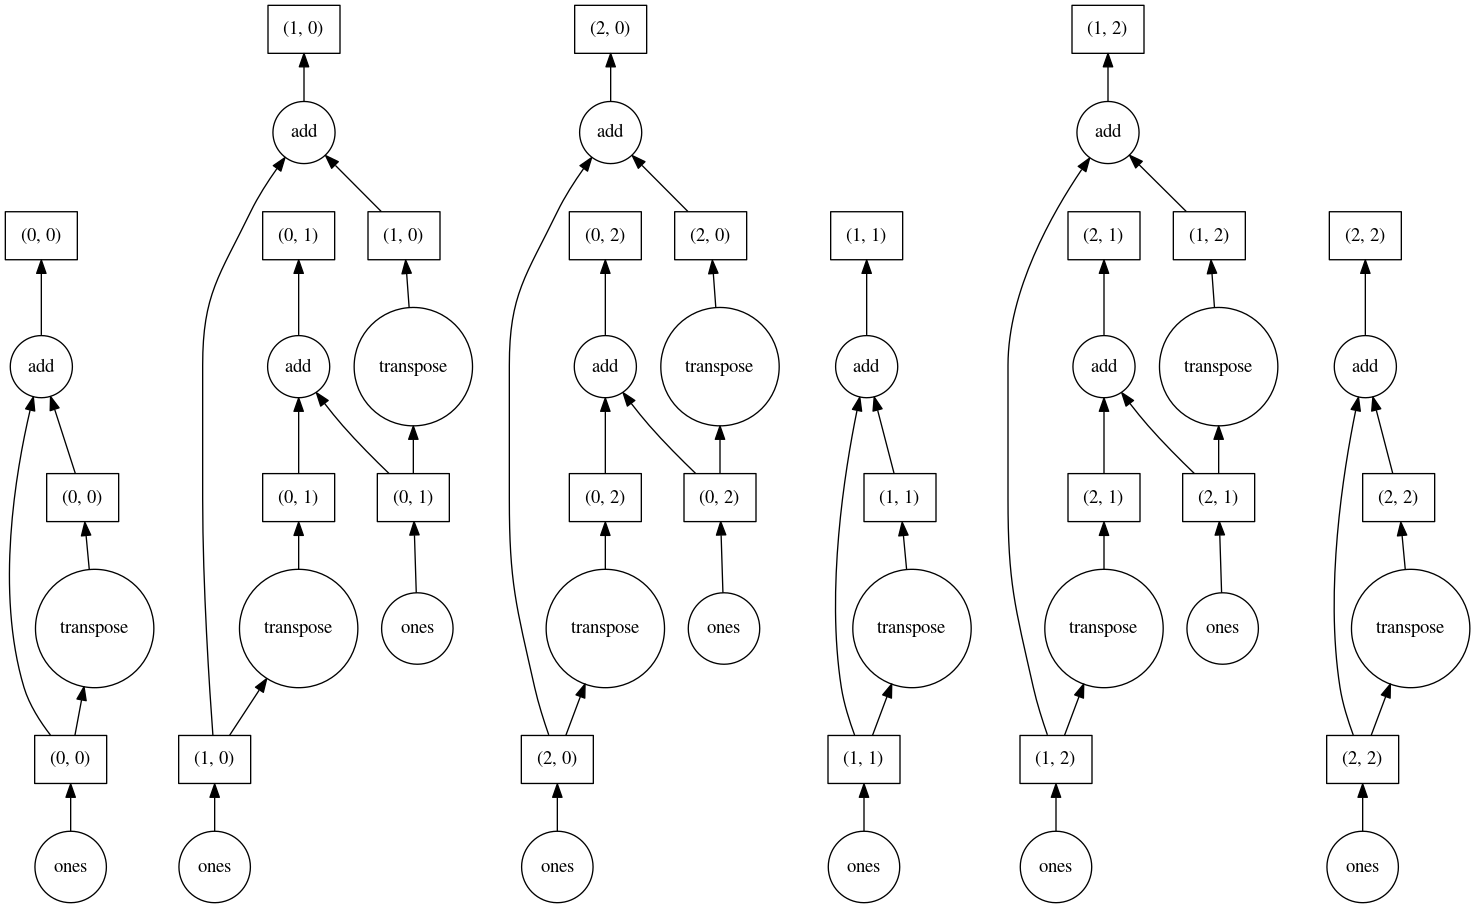

In [7]:
import dask.array as da
# i dont like the standard examples
x = da.ones((15, 15), chunks=(5, 5))
y = x + x.T
y.visualize()

In [7]:
import intake

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [8]:
from dask.distributed import Client
client = Client(processes=False, threads_per_worker=8, n_workers=6, memory_limit='64GB')

In [9]:
client

Client Scheduler: inproc://10.50.41.182/45354/1 Dashboard: http://localhost:8888/proxy/8787/status,Cluster Workers: 6 Cores: 48 Memory: 384.00 GB


In [10]:
cat = intake.open_catalog('/home/mpim/m300524/pymistral/intake/mBGC_obs.yml')
#list(cat)

In [11]:
hadisst = cat.HadISST.to_dask()

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/conventions.py:401: SerializationWarning: variable 'sst' has multiple fill values {-1e+30, -1000.0}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


In [12]:
hadisst_ym_std = hadisst.groupby('time.year').mean('time').std('year')

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [13]:
hadisst.nbytes/1e9,'GB'

(0.462429232, 'GB')

In [53]:
# load hadisst ym to visualize std
d=da.from_array(hadisst['sst'].groupby('time.year').mean('time'),chunks=(30,90,180))

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [104]:
# load hadisst to visualize std
# sinnvolle chunk groesse 300 und sinnlose 3 zeigen
d=da.from_array(hadisst['sst'],chunks=(3,90,180))

In [105]:
d

dask.array<array, shape=(1784, 180, 360), dtype=float32, chunksize=(3, 90, 180)>

In [106]:
d_std=d.std(axis=0)

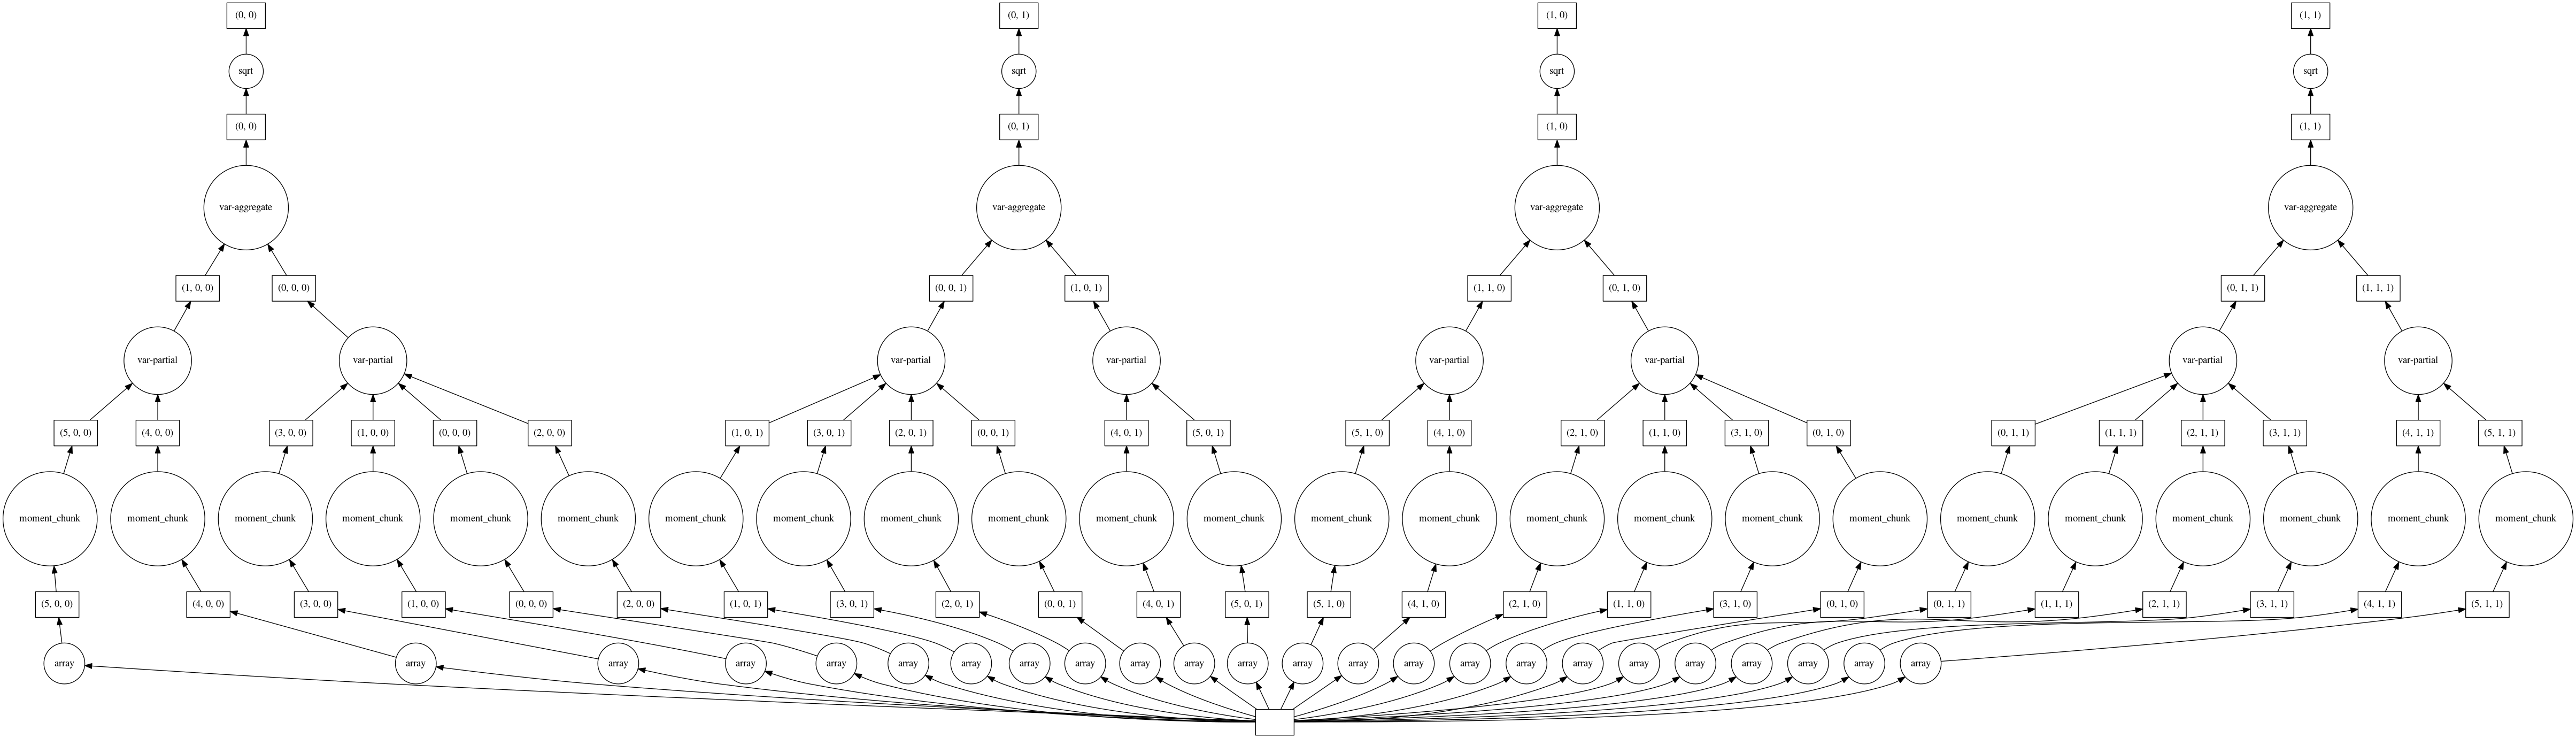

In [103]:
d_std.visualize()

In [107]:
%time d_std.compute()

CPU times: user 50.1 s, sys: 6.3 s, total: 56.4 s
Wall time: 45.7 s


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

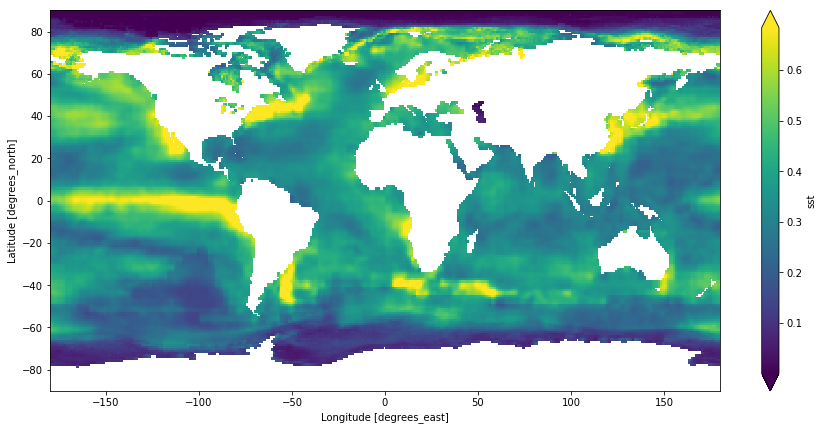

In [99]:
# plotting the results in xarray
hadisst['sst'].groupby('time.year').mean('time').std('year').plot(robust=True,figsize=(15,7))

## xarray chunks

In [50]:
chunked_dummy_data = dummy_data.chunk({'time':'12'})

In [52]:
# funktioniert nicht so wie ich will
# chunked_dummy_data.chunks

In [55]:
chunked_dummy_data_ym_std = chunked_dummy_data.groupby('time.year').mean('time').std('year')

In [58]:
chunked_dummy_data_ym_std

<xarray.DataArray (lat: 100, lon: 100)>
dask.array<shape=(100, 100), dtype=float64, chunksize=(100, 100)>
Coordinates:
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

## xarray client

### Load MODIS chla ocean color satelite data
- 295 GB (out-of-core) nur out-of-core ist nicht so spannend

In [83]:
%time modis = cat.MODIS.to_dask()
modis.nbytes/1e9,'GB'

CPU times: user 2.77 s, sys: 590 ms, total: 3.36 s
Wall time: 3.45 s


In [84]:
modis['chla']

<xarray.DataArray 'chla' (time: 198, lat: 4320, lon: 8640)>
dask.array<shape=(198, 4320, 8640), dtype=float32, chunksize=(1, 4320, 8640)>
Coordinates:
  * lat      (lat) float32 89.979164 89.9375 89.89583 ... -89.93751 -89.97918
  * lon      (lon) float32 -179.97917 -179.9375 ... 179.93752 179.97917
  * time     (time) datetime64[ns] 2002-07-16 2002-08-16 ... 2018-12-16
Attributes:
    long_name:    chlorophyll-a_concentration at sea surface OCI algorithm
    units:        mg m^-3
    valid_range:  [    0 32000]

In [93]:
%time sub=modis['chla'].sel(lat=slice(-30,-70)).isel(time=slice(0,14*12))
sub.nbytes/1e9,'GB'

CPU times: user 14 ms, sys: 0 ns, total: 14 ms
Wall time: 11.4 ms


(5.5738368, 'GB')

In [94]:
%time sub=sub.groupby('time.year').mean('time')
sub.nbytes/1e9,'GB'

CPU times: user 38 ms, sys: 1 ms, total: 39 ms
Wall time: 36.5 ms


(0.497664, 'GB')

In [95]:
%time sub=sub.std('year')
sub.nbytes/1e9,'GB'

CPU times: user 7 ms, sys: 0 ns, total: 7 ms
Wall time: 5.64 ms


(0.0331776, 'GB')

In [96]:
%time subc=sub.compute()

CPU times: user 1min 27s, sys: 1min 30s, total: 2min 57s
Wall time: 54.8 s


CPU times: user 746 ms, sys: 96 ms, total: 842 ms
Wall time: 762 ms


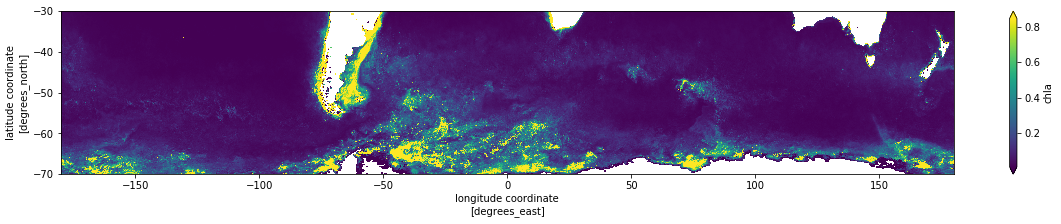

In [97]:
%time subc.plot(robust=True,figsize=(20,3))

## Live demo 4 as 3 but with SLURMCluster

In [ ]:
from dask.distributed import Client
from dask_jobqueue import SLURMCluster

cluster = SLURMCluster()

In [ ]:
cluster.scale(10)

In [ ]:
client = Client()